In [1]:
%matplotlib inline
from __future__ import division
import matplotlib.pyplot as plt
import tifffile
from PIL import Image
import os
import numpy as np
import time
import re
from skimage import data, color
import h5py
import scipy.io as spio
import sys
import seaborn
seaborn.set(font_scale=2)
seaborn.set_style('whitegrid')

from multiprocessing.dummy import Pool 

sys.path.append('/home/yves/Documents/')
import twoptb as MP



In [5]:
animal_name = 'Road_Runner_GP'
HDF_File,file_path = MP.file_management.create_base_hdf(animal_ID=animal_name,file_loc='/media/yves/Storage 2/' )

In [6]:
session_ID = '20160216'

In [7]:
HDF_File = MP.file_management.add_session_groups(file_handle = HDF_File,
                                                 session_ID=session_ID)

In [11]:
#directory containing all the directories containing all tiff files from that day
#baseDir = r'l:\Tonotopy_Mapping\Bernie-Tonemapping\\'
baseDir = r'/media/yves/Samuel/Raw/20160216/Area01/'


fs = os.listdir(baseDir) # all directories in that directory
file_Dirs = fs
#now use regex to filter which files we want to register
#file_Dirs = [re.findall(r'(.*Mapping_Area[0-9]{1,3})',name) for name in fs if re.findall(r'.*(Mapping_Area[0-9]{1,3})',name)!=[]]
file_Dirs

['(20160216_17_38_29)-_MouseOnWheelzoom2_tones1',
 '(20160216_17_48_00)-_MouseOnWheelzoom2_tones2',
 '(20160216_17_59_00)-_MouseOnWheelzoom2_tones3']

In [12]:
st = time.time()
MP.file_management.add_raw_series(baseDir=baseDir,
                                  file_Dirs=file_Dirs,
                                  HDF_File=HDF_File,
                                  session_ID=session_ID)

print time.time() - st

Load Data 0 Time: 114.468129873
Load HDF5 0 Time: 9.53674316406e-07
(20160216_17_38_29)-_MouseOnWheelzoom2_tones1
Write 0 Time: 67.737899065
Write to Disk 0 Time: 1.40594577789
Load Data 1 Time: 112.050406933
Load HDF5 1 Time: 0.000370025634766
(20160216_17_48_00)-_MouseOnWheelzoom2_tones2
Write 1 Time: 65.9960110188
Write to Disk 1 Time: 0.790565013885
Load Data 2 Time: 112.317018032
Load HDF5 2 Time: 0.000377893447876
(20160216_17_59_00)-_MouseOnWheelzoom2_tones3
Write 2 Time: 66.2752811909
Write to Disk 2 Time: 0.445652961731
541.770373106


In [17]:
HDF_File = h5py.File(file_path,'a',libver='latest')

In [21]:
areas = HDF_File[session_ID]['raw_data'].keys()

In [97]:
areaF = HDF_File[session_ID]['raw_data'][areas[0]]

In [23]:
areD_1 = np.array(HDF_File[session_ID]['raw_data'][areas[0]])

In [64]:
from skimage.measure import block_reduce
st = time.time()
areaD_s = block_reduce(areD_1[:,1:-1,1:-1], block_size=(1,5, 5), func=np.mean)
print time.time() - st

24.435240984


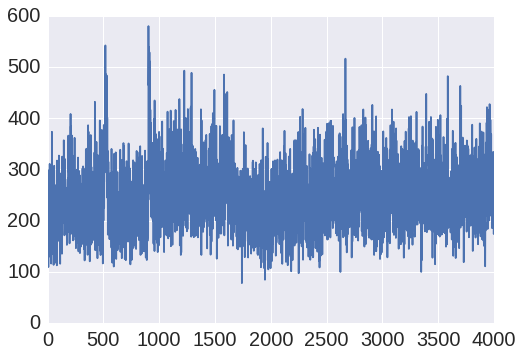

In [82]:

plt.plot(areaD_s[:4000,30,50])

False

# Get Stimuli

In [395]:
def makebv(x,t):
    phi = np.pi*x
    a = 0.2
    c = 0
    x = a*(t+c)*np.pi
    a2 = (1/2)*np.cos( (x - phi) )+ 1/2
    if type(x)!=float:
        a3 = np.array([1 if (i>(phi-np.pi) and i<(phi+ np.pi)) else 0 for i in x])
    else:
        a3 = 1 if (x>(phi-np.pi) and x<(phi+ np.pi)) else 0 
    out = a2*a3
    return out


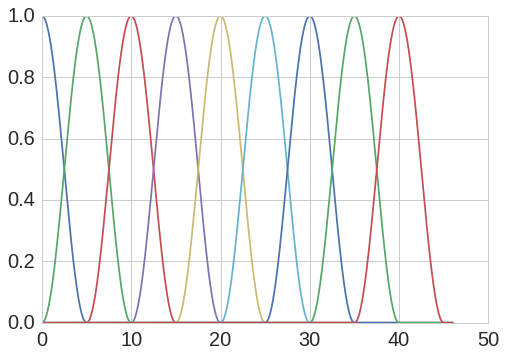

## Inferring the tuning properties
Ok so now we have made the basis functions for parameterising the frequency selectivitiy of the neurons

Now, we assume that the best frequency is a linear function of the mapping of the frequency value onto the vector 
of these basis functions. This gives us the vis from the paper

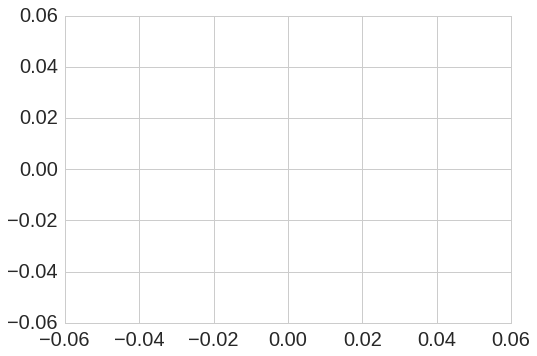

In [415]:
vis[8].dot(np.linspace(0,1,num=9))

0.20681356214843422

In [100]:
areaF.attrs['scanFramRate']

KeyError: "Can't open attribute (Can't locate attribute in name index)"

In [3]:
import scipy.io as spio
matFilePth = '/media/yves/Storage 2/Road_Runner_GP/search_tones_outDat_2016_2_16_17_38_0.mat'
grabI = MP.file_management.load_images.load_GRABinfo(spio.loadmat(matFilePth,struct_as_record=False, squeeze_me=True)['outDat'])

In [4]:
matFilePth = '/media/yves/Samuel/Processed/20160216/Area01/Quarter1.mat'

a = spio.loadmat(matFilePth,struct_as_record=False, squeeze_me=True)

/home/yves/anaconda2/lib/python2.7/site-packages/scipy/io/matlab/mio.py:135: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [5]:
np.logspace(np.log10(1250),np.log10(2500),num=5)

array([ 1250.        ,  1486.50889375,  1767.76695297,  2102.24103813,
        2500.        ])

In [6]:
grabI['trialOrder'].shape[0]/12

25.0

In [7]:
frqs = np.unique(grabI['stimMat'][:,0])
nFreqs = len(frqs)
print nFreqs

25


In [8]:
groupedStims = np.floor((grabI['trialOrder']-1)/4)

nOccs = [] #number of occurrences
for i in np.unique(groupedStims):
    nOccs.append(np.sum(groupedStims==i))



In [9]:
grabI['sweepLengthFrames']*np.floor(grabI['trialOrder']/3)

array([  630.,  1170.,  1125.,   225.,    90.,   675.,  1035.,   540.,
        1260.,   990.,   405.,   945.,   180.,   315.,   135.,   945.,
         225.,  1395.,   135.,   765.,  1170.,  1170.,  1170.,    45.,
        1485.,   855.,   945.,   900.,   225.,   720.,   630.,   180.,
        1440.,   810.,   225.,   360.,   495.,   180.,   270.,  1080.,
         360.,  1350.,    45.,  1080.,     0.,  1125.,  1215.,     0.,
         765.,   270.,  1395.,   495.,   270.,    90.,  1080.,   855.,
         225.,  1305.,   450.,   720.,   405.,  1125.,  1440.,  1125.,
        1215.,  1035.,   765.,   270.,   495.,  1080.,   675.,  1080.,
         360.,   225.,  1350.,  1350.,   225.,   180.,   720.,  1260.,
         630.,  1305.,    45.,  1080.,   450.,    45.,   225.,   225.,
         990.,  1395.,   810.,   585.,   315.,   990.,    90.,   765.,
         945.,   180.,  1395.,   720.,   630.,   990.,   855.,   810.,
         585.,   135.,  1395.,   135.,   495.,    90.,   360.,   495.,
      

# Now lets find P(m|r) for this example

We have the vis. Now vis.shape = (33,9). This means that to access the parameters that go into stimulus i,
you select vis[i,:].

In [10]:
for stim,resp in resps:
    
    

IndentationError: expected an indented block (<ipython-input-10-d4ecc09a990e>, line 3)

# Interlude: Bayesian Linear Regression 

##  First, lets do it simple and in 1-D.

### Ok first lets draw some random weights

In [548]:
W = np.random.random(2)*5

In [560]:
# Now some x-locations

x_1 = np.repeat([1,2,3,8,9,12,13,14,15],2)
x_0 = 1

x = np.vstack([[x_0]*np.product(x_1.shape),x_1])

In [561]:
# now lets define a noise model
noiseVar = 4
noise = lambda s: np.random.normal(loc=0,scale=noiseVar,size=s)

## Now lets generate some fake data

In [562]:
y = x.T.dot(W) + noise(x_1.shape)

### Define a prior 

$w \sim \mathcal{N}(0,\Sigma_p) $ s.t. $\Sigma_p=2I$

In [563]:
from scipy.stats import multivariate_normal

prior_cov = np.eye(2)*9
prior_w = multivariate_normal(mean=[0,0],
                              cov=prior_cov)

### Lets draw some samples from the prior 

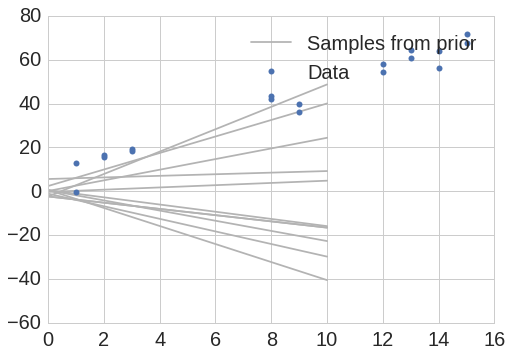

In [564]:
sample_x1s = np.linspace(0,10,num=100)
sample_xs = np.vstack([[x_0]*len(sample_x1s),sample_x1s])
for i in range(10):
    sample_ws = prior_w.rvs()
    plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3)
plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3,label='Samples from prior')

plt.plot(x_1,y,'o',markersize=6,label='Data')
plt.legend()

## Now calculate the posterior 

In [565]:
posterior_cov = np.linalg.inv((noiseVar**-2)*x.dot(x.T) + np.linalg.inv(prior_cov))
posterior_mu = (noiseVar**-2)*posterior_cov.dot(x).dot(y)

###Define the posterior distribution
posterior = multivariate_normal(mean=posterior_mu,cov=posterior_cov)

## Do some plotting 

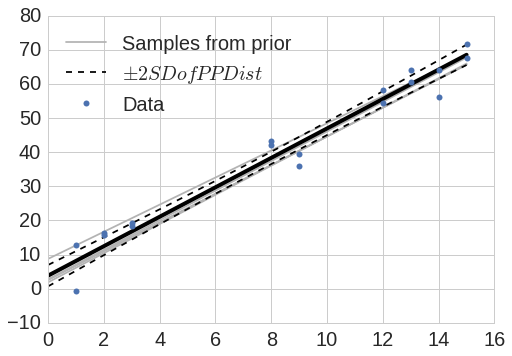

In [566]:
sample_x1s = np.linspace(0,15,num=100)
sample_xs = np.vstack([[x_0]*len(sample_x1s),sample_x1s])

post_pred_var = np.diag(sample_xs.T.dot(posterior_cov).dot(sample_xs))
for i in range(4):
    sample_ws = posterior.rvs()
    plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3)
plt.plot(sample_x1s,sample_xs.T.dot(sample_ws),color=[.7]*3,label='Samples from prior')


plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu),linewidth=4,color='k')
plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu)-np.sqrt(post_pred_var)*2,'--',color='k')
plt.plot(sample_x1s,sample_xs.T.dot(posterior_mu)+np.sqrt(post_pred_var)*2,'--',
         color='k',label=r'$\pm2SD of PP Dist$')

plt.plot(x_1,y,'o',markersize=6,label='Data')
plt.legend(loc='best')

# Interlude 2: Now lets infer psychometric functions like so 

## First lets pretend that our tuning curves are gaussian and have some gaussian noise 

In [573]:
def sample_neuron(best_resp=12,noiseVar=.4,sigma=.5,nRepeats=6,maxA=1,plot=False):
    
    """ Sample the responses of a neuron
    
        Parameters:
        ----------------
        best_resp:   int
                     the index of frequency of the best response
                     
        noiseVar:    float
                     variance of the response of the neuron
        
        sigma:       float
                     width of the runing curve
        
        nRepeats:   int
                    number of stimulus repetiations to sample
                    
        maxA:       float
                    gain factor for response function
            
        plot:       bool
                    whether to plot the tuning curve + responses
    """
    
    # this defines the response function to the neuron
    g = lambda x: ((np.sqrt(2*np.pi*sigma**2))**-1)*np.exp(-(x-best_resp)**2/(2*sigma**2))*maxA
    
    xs = np.linspace(0,nFreqs,num=900)
    
    resps = [(x,(np.random.random()<.05)*np.random.random()+np.random.normal(loc=g(x),scale=noiseVar*(g(x)*2+.3),size=1))
         for x in np.repeat(np.linspace(0,nFreqs-1,num=nFreqs),repeats=nRepeats)]
    
    y = [i[1] for  i in resps]
    x = np.unique([i[0] for i in resps])
    
    if plot:
        plt.plot(xs, g(xs))
        for i,resp in enumerate(resps):
            plt.scatter(resp[0],resp[1],marker='+',s=36)
    
    return resps, x, y, g

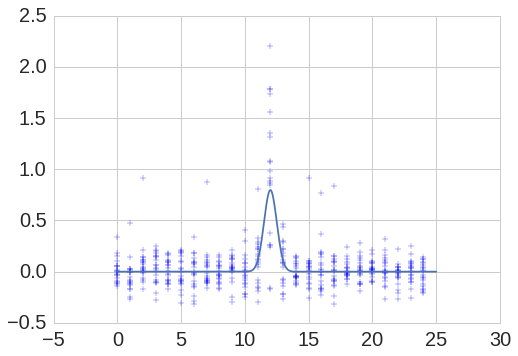

In [574]:
resps,x,y,g = sample_neuron(best_resp=12,noiseVar=.4,sigma=.5,nRepeats=20,plot=True)

###  There is no way we can fit a linear function to this, so lets reparameterise our space in terms of basis functions

In [575]:
def makebv(x,t):
    phi = np.pi*x
    a = .5
    c = 0
    x = a*(t+c)*np.pi
    a2 = (1/2)*np.cos( (x - phi) )+ 1/2
    if type(x)!=float:
        a3 = np.array([1 if (i>(phi-np.pi) and i<(phi+ np.pi)) else 0 for i in x])
    else:
        a3 = 1 if (x>(phi-np.pi) and x<(phi+ np.pi)) else 0 
    out = a2*a3
    return out


In [576]:
def basis_value(phi_offset,t,single_value=False,**kwargs):
    
    """ Apply a raised cosine basis function to the input
    
        Parameters:
        ---------------
        
        phi_offset:    float
                       this parameter controls the offset of the
                       cosine basis function from the point t=0
        
        t:             float
                       the input value to the basis function
                    
        single_value:  bool
                       whether t is just a single value or not
        
        
        Returns:
        ---------------
        
        out:           float | array
                       the value of the basis function at the value t
    """
    
    kwargs.setdefault('a',.5) #Parameter controlling the width of the basis functions
    kwargs.setdefault('c',0)  #another basis function parameter
    a = kwargs['a']
    c = kwargs['c']
    
    phi = np.pi*phi_offset
    
    
    x = a*(t+c)*np.pi
    a2 = (1/2)*np.cos( (x - phi) )+ 1/2
    if not single_value:
        a3 = np.array([1 if (i>(phi-np.pi) and i<(phi+ np.pi)) else 0 for i in x])
    else:
        a3 = 1 if (x>(phi-np.pi) and x<(phi+ np.pi)) else 0 
    out = a2*a3
    return out


# Now lets plot the basis functions 

In [577]:

phi_params = np.linspace(0,13,num=24)

#These three lines just plot the basis functions
#t = np.linspace(0,nFreqs+3,num=900)
#for phi in phi_params:
#    plt.plot(t,basis_value(phi,t))



### Now for each point that we have measured, lets project this into the space of our basis functions these will define our new xs

In [578]:
def project_X(phi_params,xs):
    """ Project an array of 1-D value into a space parameterised by
        a series of raised cosine basis functions 
        (see also function basis value)
        
        Parameters:
        ------------
        
        phi_params:    array
                       parameters for the raised cosine basis function
                       
        xs:            array
                       input points
                       
        Returns:
        -----------
        X:             array
                       an array of size (len(phi_params),len(xs)),
                       corresponding to the projection of the data
                       into the space of all basis functions
    """
    X = []
    for x in xs:
        temp = []
        for phi in phi_params:
            #print type(x)==float
            temp.append(basis_value(phi,float(x),single_value=1))
        X.append(temp)
    return np.array(X)

x_locs = [i[0] for i in resps]
X = project_X(phi_params,x_locs).T



In [579]:
class linear_RF_model(object):
    
    """ Linear Bayesian Receptive Field Model """
    
    
    def __init__(self,name,responses,g,frqs,phi_params):
        
        """ Initialise with Data and Responses Function
        
        Parameters:
        ------------
        name        int | str
                    something to index your neuron by
        
        responses   list of tuples
                    a list of tuples (x,y) of the non-projected x and y values
        
        g           function
                    the response function of the neuron
                    
                    
        frqs        array
                    frequencies of sounds used as stimuli
                    
        phi_params  array
                    parameter values passed to the basis functions
                    
        """
        
        self.name=name
        self.g = g
        self.frqs = frqs
        self.responses = responses
        self.respFs = [i[0] for i in self.responses]
        self.nFreqs = len(np.unique(self.respFs))
        self.phi_params = phi_params
        
    
    def add_prior(self,prior_cov):
        self.cov_prior = prior_cov
        self.prior = multivariate_normal(mean=np.zeros(prior_cov.shape[0]),
                                         cov=prior_cov)
    def add_data(self,X,Y,noiseVar=.5):
        self.X = X
        self.Y = Y
        self.noiseVar = noiseVar
    
    def infer_posterior(self):
        self.posterior_cov = np.linalg.inv((self.noiseVar**-2)*self.X.dot(self.X.T) + np.linalg.inv(self.cov_prior))
        self.posterior_mu = (self.noiseVar**-2)*self.posterior_cov.dot(self.X).dot(self.Y)
        
        ###Define the posterior distribution
        posterior = multivariate_normal(mean=posterior_mu.flatten(),cov=posterior_cov)
    
    def plot_posterior(self):
        
        """ Plot the Posterior Together with the data """
        plt.figure(figsize=(12,6))
        x_samps = np.linspace(0,self.nFreqs,num=900)
        plt.plot(x_samps, self.g(xs),color=[.8,.2,.2],linewidth=3,label='$True Function$')
        


        X = project_X(self.phi_params,x_samps).T
        
        boxcar_mu = self._get_boxcar()
        
        y = [i[1] for  i in self.responses]

        self.ppSD = self._calc_posterior_uncertainty(X)
        
        for i,resp in enumerate(self.responses):
            plt.scatter(resp[0],resp[1],marker='+')
        plt.scatter(resp[0],resp[1],marker='+',label=r'raw data')
        pMu = X.T.dot(self.posterior_mu)
        plt.plot(x_samps,pMu.flatten(),'.-',color='k',label=r'$posterior \ mean$')
        
        plt.plot(x_samps,pMu.flatten() + self.ppSD,'--',color='k')
        plt.plot(x_samps,pMu.flatten() - self.ppSD,'--',color='k',label=r'$\pm2SD$')
        
        plt.plot(range(self.nFreqs),boxcar_mu,'.-',label=r'$empirical \ mean$')
        plt.xticks(range(self.nFreqs)[::2],np.round(self.frqs/1000,decimals=1)[::2])
        plt.xlim(0,self.nFreqs-1)
        plt.xlabel('Frequency (kHz)')
        plt.legend(loc='best')

    def _get_boxcar(self):
        boxcar_mu = np.zeros(nFreqs)
        ctr = np.zeros(nFreqs)
        for i,resp in self.responses:
            ctr[i] += 1
            boxcar_mu[i] += resp
           
        return boxcar_mu / ctr
    
    def _calc_posterior_uncertainty(self,X):
        
        """ return 2*SD of the posterior uncertainty at a set of points """
        
        post_pred_var = np.diag(X.T.dot(self.posterior_cov).dot(X))
        return 2*np.sqrt(post_pred_var)

In [580]:
rf = linear_RF_model(1,responses=resps,g=g,frqs=frqs,phi_params=phi_params)

In [581]:
rf.add_prior(np.eye(X.shape[0])*2)
rf.add_data(X,y)
rf.infer_posterior()

/home/yves/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/yves/.local/lib/python2.7/site-packages/ipykernel/__main__.py:92: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


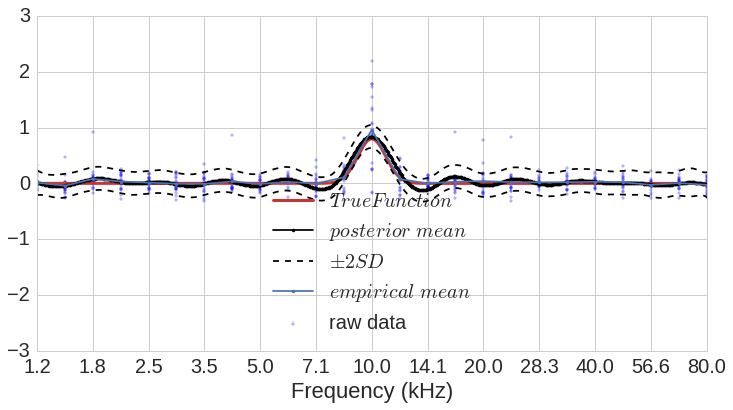

In [582]:
rf.plot_posterior()

##  Now compressed

In [602]:
resps,x,y,g = sample_neuron(best_resp=6,
                            noiseVar=.4,
                            sigma=.5,
                            nRepeats=7,
                            plot=False,
                            maxA=3)


phi_params = np.linspace(0,13,num=24)
x_locs = [i[0] for i in resps]
X = project_X(phi_params,x_locs).T

/home/yves/.local/lib/python2.7/site-packages/ipykernel/__main__.py:91: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/yves/.local/lib/python2.7/site-packages/ipykernel/__main__.py:92: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


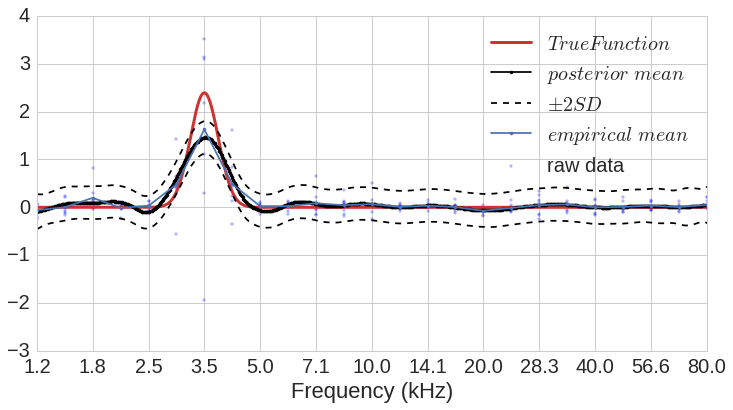

In [603]:
rf = linear_RF_model(1,responses=resps,g=g,frqs=frqs,phi_params=phi_params)
rf.add_prior(np.eye(X.shape[0])*2)
rf.add_data(X,y)
rf.infer_posterior()
rf.plot_posterior()

# Now fit a population of neurons in a vectorised operation

In [ ]:
class population_RFs(object):
    
    def __init__(self,neurons):
        